In [1]:
import sys
sys.path.append("../../ranking/")
sys.path.append("../../tests/")

In [2]:
from rank_variants import RankVariants
from measurements_visualizer import MeasurementsVisualizer
from measurements_simulator import MeasurementsSimulator
from measure_and_rank import measure_and_rank
import pandas as pd

### Simulate Normal distributions

Specify the mean and standard deviation for each algorithm

### Example 1: Significant overlaps

In [24]:
cfg = {}
cfg['alg1']  = [0.2,0.02] #[mean, std]
cfg['alg2']  = [0.2,0.01]
cfg['alg3']  = [0.2,0.01]
cfg['alg4']  = [0.19,0.01]
h0 = list(cfg.keys())

### Rank algorithms after every 3 measurements per algorithm

Refer Procedure 4 in [?] for details about the parameters

In [25]:
ms = MeasurementsSimulator(cfg, 'normal') 
rep_steps = 3
eps = 0.03
max_rep = 50
s, mr, history = measure_and_rank(ms, h0, rep_steps=rep_steps, eps=eps, max_rep=max_rep)

  case:concept:name  case:mean-rank
3              alg4           0.000
0              alg1           0.750
1              alg2           0.750
2              alg3           1.625
norm: 0.7029513674501245
  case:concept:name  case:mean-rank
0              alg4           0.000
1              alg1           0.125
2              alg2           0.375
3              alg3           0.375
norm: 0.38654115240165565
  case:concept:name  case:mean-rank
0              alg4           0.000
1              alg1           0.000
2              alg2           0.125
3              alg3           0.125
norm: 0.06987712429686843
  case:concept:name  case:mean-rank
0              alg4           0.000
1              alg1           0.125
2              alg2           0.125
3              alg3           0.125
norm: 0.03125
  case:concept:name  case:mean-rank
0              alg4           0.000
1              alg1           0.125
3              alg3           0.125
2              alg2           0.250
norm: 0.0

#### Ranks

In [26]:
s

,case:rank:q95-q5,case:rank:q90-q10,case:rank:q85-q15,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:rank:q55-q45
case:concept:name,,,,,,,,
alg4,0,0,0,0,0,0,0,0
alg1,0,0,0,0,0,0,0,1
alg3,0,0,0,0,0,0,0,1
alg2,0,0,0,0,0,0,0,2


#### Mean ranks

In [27]:
mr

,case:concept:name,case:mean-rank
0,alg4,0.000
1,alg1,0.125
2,alg3,0.125
3,alg2,0.250


#### Visulaize data

In [15]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)

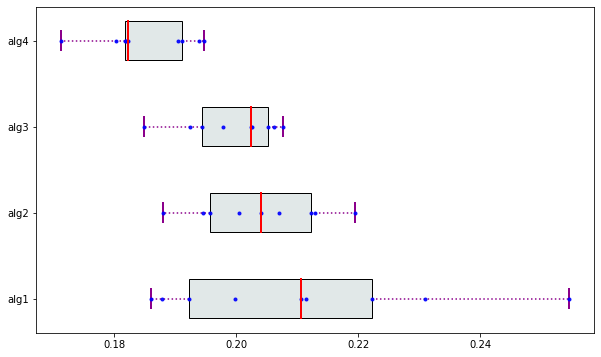

In [16]:
mv.show_measurements_boxplots()

### Example 2: Non-significant overlaps

Requires less  measurements than the example with algorithms having siginificant overlaps.

In [28]:
cfg = {}
cfg['alg1']  = [0.4,0.02] #[mean, std]
cfg['alg2']  = [0.2,0.01]
cfg['alg3']  = [0.25,0.01]
cfg['alg4']  = [0.15,0.01]
h0 = list(cfg.keys())

In [29]:
ms = MeasurementsSimulator(cfg, 'normal') 
rep_steps = 3
eps = 0.03
max_rep = 50
s, mr, history = measure_and_rank(ms, h0, rep_steps=rep_steps, eps=eps, max_rep=max_rep)

  case:concept:name  case:mean-rank
0              alg4             0.0
1              alg2             1.0
2              alg3             2.0
3              alg1             3.0
norm: 1.0606601717798212
  case:concept:name  case:mean-rank
0              alg4             0.0
1              alg2             1.0
2              alg3             2.0
3              alg1             3.0
norm: 0.0
Number of measurements: 6


In [30]:
s

,case:rank:q95-q5,case:rank:q90-q10,case:rank:q85-q15,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:rank:q55-q45
case:concept:name,,,,,,,,
alg4,0,0,0,0,0,0,0,0
alg2,1,1,1,1,1,1,1,1
alg3,2,2,2,2,2,2,2,2
alg1,3,3,3,3,3,3,3,3


In [31]:
mr

,case:concept:name,case:mean-rank
0,alg4,0.0
1,alg2,1.0
2,alg3,2.0
3,alg1,3.0


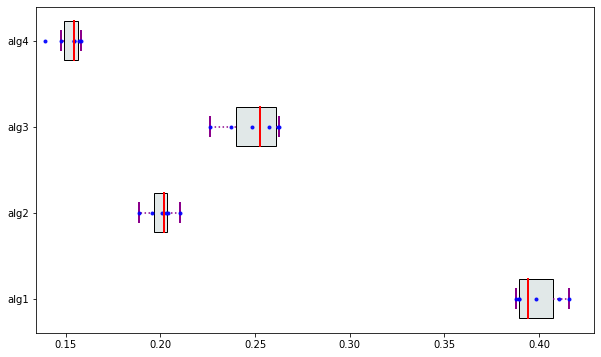

In [20]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
mv.show_measurements_boxplots()